In [15]:
import numpy as np
import random
import pandas as pd
from pandas import plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

import xgboost as xgb #決策樹
import lightgbm as  lgb
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler, LabelBinarizer
# auxiliary function
from sklearn.preprocessing import LabelEncoder
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

import pandas_profiling as pp

import warnings
warnings.filterwarnings('ignore')

In [16]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# EDA


In [17]:
df.info()
df.shape, df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


((150, 5),
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
        'species'],
       dtype='object'))

In [18]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
Species = df['species'].unique()
Species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<AxesSubplot:>

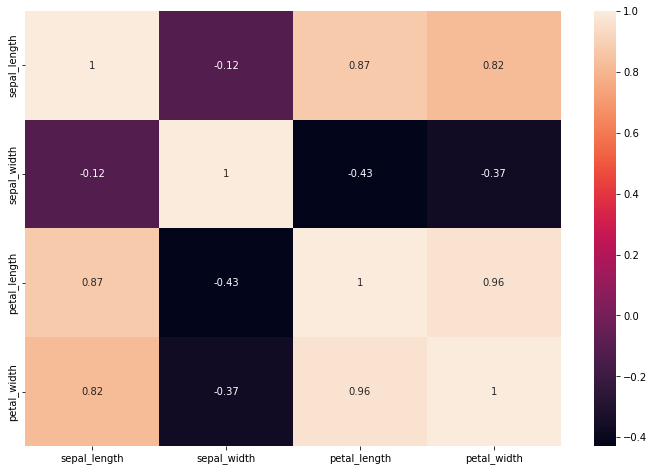

In [20]:
corr = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
        'species']].corr()


plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

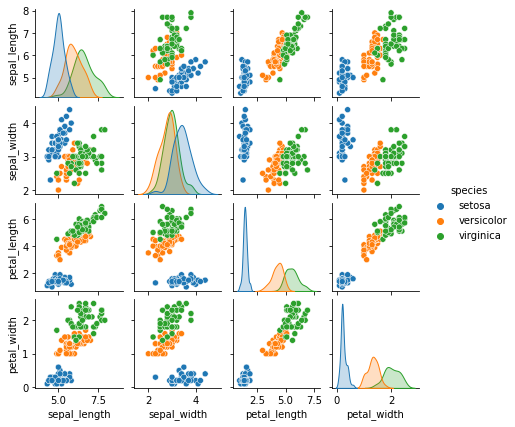

In [21]:
sns.pairplot(df,hue = 'species',size=1.5)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

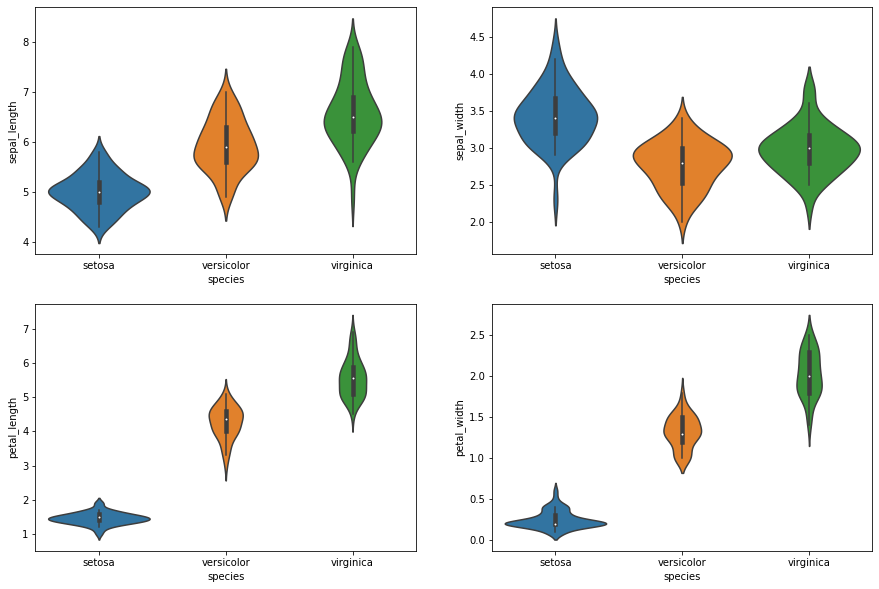

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=df)

In [10]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Machine learning

In [23]:
X_iris = df.drop('species',axis = 1) #特徵矩陣
X_iris.shape

(150, 4)

In [24]:
y_iris = df['species'].values#目標矩陣
y_iris.shape

(150,)

In [25]:
encoder = LabelEncoder()
y_iris = encoder.fit_transform(y_iris)
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest, = train_test_split(X_iris,y_iris,test_size = 0.3, random_state = 101)
Xtrain,Xtest,Ytrain,Ytest

#X_train 與 y_train 是實際參與行訓練的資料。
#而 X_test 與 y_test是未參與訓練的資料，它是被拿來測試評估最終訓練好的模型。

(     sepal_length  sepal_width  petal_length  petal_width
 13            4.3          3.0           1.1          0.1
 102           7.1          3.0           5.9          2.1
 67            5.8          2.7           4.1          1.0
 34            4.9          3.1           1.5          0.2
 98            5.1          2.5           3.0          1.1
 ..            ...          ...           ...          ...
 63            6.1          2.9           4.7          1.4
 70            5.9          3.2           4.8          1.8
 81            5.5          2.4           3.7          1.0
 11            4.8          3.4           1.6          0.2
 95            5.7          3.0           4.2          1.2
 
 [105 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 33            5.5          4.2           1.4          0.2
 16            5.4          3.9           1.3          0.4
 43            5.0          3.5           1.6          0.6
 129           7.2          3

In [ ]:
plot_importance(model_new)
plt.show()

# logistic regression

Logistic Regression -  0.9777777777777777


<AxesSubplot:>

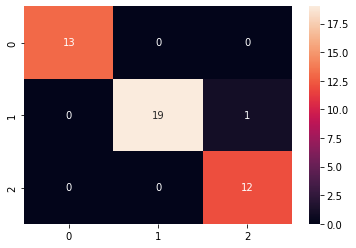

In [48]:
lr_model = LogisticRegression()
lr_model.fit(Xtrain,Ytrain)
lr_predict = lr_model.predict(Xtest)

print('Logistic Regression - ',accuracy_score(lr_predict,Ytest))
cm = confusion_matrix(Ytest, lr_predict)
sns.heatmap(cm, annot=True)

# naive bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain,Ytrain)
y_model = model.predict(Xtest)
accuracy_score(Ytest,y_model)

0.9555555555555556

<AxesSubplot:>

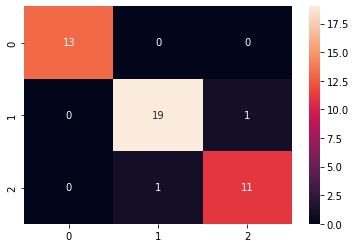

In [50]:
accuracy_score(Ytest,y_model)
cm = confusion_matrix(Ytest, y_model)
sns.heatmap(cm, annot=True)

# PCA

In [30]:
from sklearn.decomposition import PCA
model = PCA (n_components = 2) #主成分兩個
model.fit(X_iris)
X_2D = model.transform(X_iris)#將資料轉化為二維
#X_2D

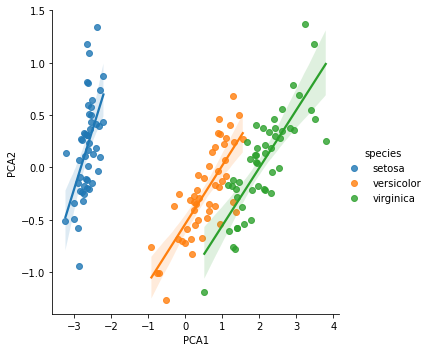

In [31]:
df["PCA1"] = X_2D[:,0]
df["PCA2"] = X_2D[:,1]
sns.lmplot("PCA1","PCA2",hue="species",data = df)#,fit_reg=False

In [32]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628


# Gaussian mixture model

In [33]:
from sklearn.mixture import GaussianMixture as GMM
model = GMM(n_components = 3,covariance_type = 'full') #主成分三個
model.fit(X_iris)#訓練
y_gmm = model.predict(X_iris)#Y_GMM = 訓練後的數據集
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

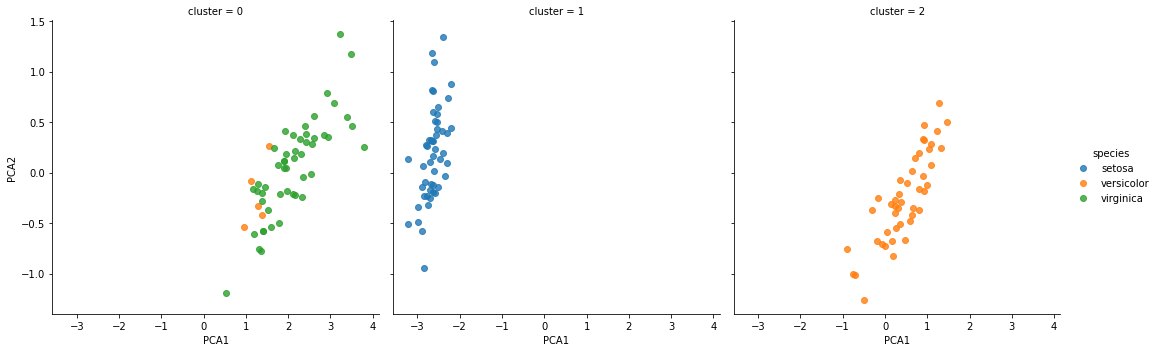

In [34]:
df['cluster'] = y_gmm
sns.lmplot("PCA1","PCA2", hue="species", col = 'cluster', data = df,fit_reg=False)

# SVM 

SVM -  1.0


<AxesSubplot:>

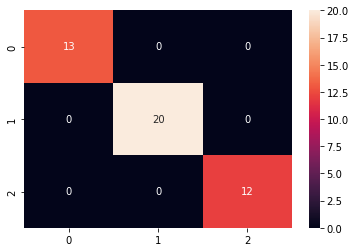

In [41]:
svm_model = SVC(kernel='linear')
svm_model.fit(Xtrain,Ytrain)
svc_predict = svm_model.predict(Xtest)

print('SVM - ',accuracy_score(svc_predict,Ytest))

cm = confusion_matrix(Ytest, svc_predict)
sns.heatmap(cm, annot=True)

# Decision tree

Decision Tree -  0.9333333333333333


<AxesSubplot:>

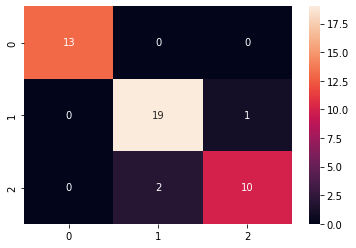

In [42]:
dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(Xtrain,Ytrain)
dt_predict = dt_model.predict(Xtest)

print('Decision Tree - ',accuracy_score(dt_predict,Ytest))

cm = confusion_matrix(Ytest,dt_predict)
sns.heatmap(cm, annot=True)

# Random forest 

random forest  0.9777777777777777


<AxesSubplot:>

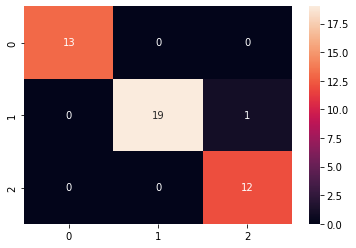

In [43]:
rfc_model = RandomForestClassifier(max_depth=3)
rfc_model.fit(Xtrain,Ytrain)
rfc_predict = rfc_model.predict(Xtest)


print('random forest ',accuracy_score(rfc_predict,Ytest))
cm = confusion_matrix(Ytest,rfc_predict)
sns.heatmap(cm, annot=True)

# Extra Tree Classifier

Extra Tree Classifier -  0.9555555555555556


<AxesSubplot:>

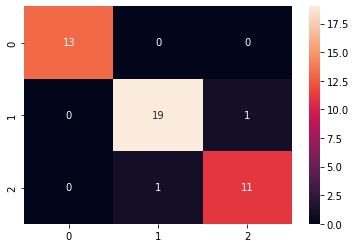

In [44]:
etc_model = ExtraTreesClassifier()
etc_model.fit(Xtrain,Ytrain)
etc_predict = etc_model.predict(Xtest)

print('Extra Tree Classifier - ',accuracy_score(etc_predict,Ytest))
cm = confusion_matrix(Ytest,etc_predict)
sns.heatmap(cm, annot=True)

# KNN

knn -  1.0


<AxesSubplot:>

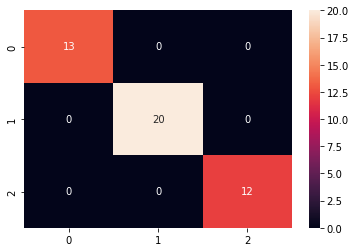

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(Xtrain,Ytrain)
knn_predict = knn_model.predict(Xtest)

print('knn - ',accuracy_score(knn_predict,Ytest))

cm = confusion_matrix(Ytest, knn_predict)
sns.heatmap(cm, annot=True)

# XGBoost

In [40]:
xg_model = xgb.XGBClassifier()
xg_model = xg_model.fit(Xtrain,Ytrain)
print('XGBoost -',xg_model.score(Xtest, Ytest))

XGBoost - 0.9777777777777777
